In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport Dataset_QSH
%aimport models.base
%aimport models.AEFIT5

import livelossplot.keras
class PlotLossesCallback(livelossplot.keras.PlotLossesCallback):
    def on_train_batch_begin(self, a, b): pass
    def on_train_batch_end(self, a, b): pass
    def on_test_begin(self, a): pass
    def on_test_end(self, a): pass
    def on_test_batch_begin(self, a, b): pass
    def on_test_batch_end(self, a, b): pass

Hunch models imported
reload set for module  Hunch_utils
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


Using TensorFlow backend.


In [2]:
qsh = Dataset_QSH.Dataset_QSH()
import os
file = ipysh.abs_builddir+'/te_db_r15u_shuffle.npy'
qsh.load(file)


In [3]:
# qsh.shuffle()
# qsh.filter_number_set(15)
qsh.clean_up_poorcurves(5)
qsh.dim = 15
qsh.set_null(np.nan)
qsh.set_normal_positive()
# qsh.unbias_mean(0.5, 'te')
# qsh.set_normal_positive()

print("QSH rebalanced 15 points size: ", len(qsh))

QSH rebalanced 15 points size:  47567


In [ ]:
# qsh.set_null(np.nan)
# qsh.clip_values(0.1,0.6)
# qsh.set_normal_positive()
# qsh.set_null(np.nan)

## VAE reconstruction - beta

The dropout has been set to 0. ... otherwise it seems to not converge ( tested with 0.4 )
Moreover also beta has been set to 0. ... that corresponds to a deterministic vae

In [4]:
vae2  = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=30, dprate=0., scale=1, beta=0.00001, geometry=[20,20,10,10])
vae6  = models.AEFIT5.AEFIT5(latent_dim=6, feature_dim=30, dprate=0., scale=1, beta=0.000001, geometry=[20,20,10,10])

AEFIT5 ready:
AEFIT5 ready:


In [5]:
ds = qsh.ds_array.map(lambda x,l: (x,x))

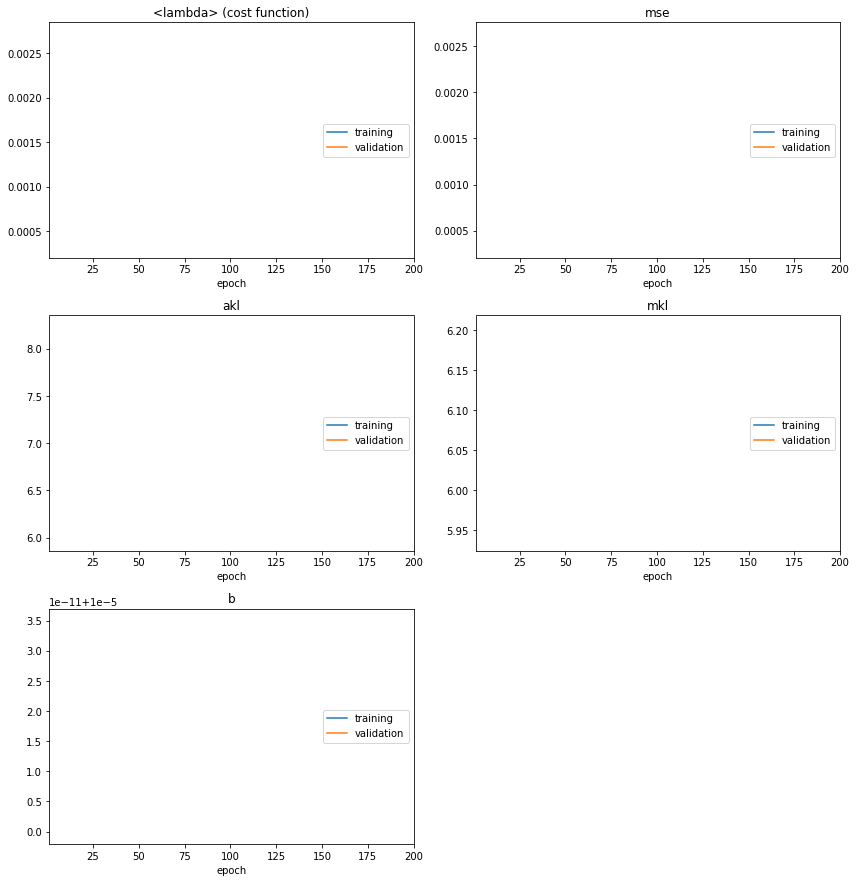

<lambda> (cost function):
training   (min:    0.003, max:    0.003, cur:    0.003)
validation (min:    0.000, max:    0.000, cur:    0.000)

mse:
training   (min:    0.003, max:    0.003, cur:    0.003)
validation (min:    0.000, max:    0.000, cur:    0.000)

akl:
training   (min:    8.237, max:    8.237, cur:    8.237)
validation (min:    5.975, max:    5.975, cur:    5.975)

mkl:
training   (min:    6.205, max:    6.205, cur:    6.205)
validation (min:    5.937, max:    5.937, cur:    5.937)

b:
training   (min:    0.000, max:    0.000, cur:    0.000)
validation (min:    0.000, max:    0.000, cur:    0.000)
445/445 [==============================] - 21s 47ms/step - loss: 0.0027 - mse: 0.0026 - akl: 8.2372 - mkl: 6.2047 - b: 1.0000e-05 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00 - val_akl: 0.0000e+00 - val_mkl: 0.0000e+00 - val_b: 0.0000e+00
Epoch 2/200
29/30 [============================>.] - ETA: 0s - loss: 3.8016e-04 - mse: 3.2121e-04 - akl: 5.8951 - mkl: 5.9087 - b: 1.0000e-05

In [6]:
def fun():
    global h2
    h2 = vae2.fit( ds.skip(3000).batch(100, drop_remainder=True), validation_data=ds.take(3000).batch(100), 
                   callbacks=[PlotLossesCallback()], 
                   epochs=200, shuffle=False)
models.base.fn_thread(fn=fun, model=vae2).control_panel()

In [ ]:
def fun():
    global h6
    h6 = vae6.fit( ds.skip(3000).batch(100, drop_remainder=True), validation_data=ds.take(3000).batch(100), 
                   callbacks=[PlotLossesCallback()], 
                   epochs=200, shuffle=False)
models.base.fn_thread(fn=fun, model=vae6).control_panel()

In [7]:
p = Hplt.LSPlotBokeh()
p.set_model(vae2)
p.set_data(qsh, counts=1000)
p.plot_notebook(notebook_url='http://localhost:8888')

/home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/andrea/devel/rfx/rfx-hunch/src/Tprofile_read/Hunch_lsplot.py:295: RuntimeWarning: invalid value encountered in true_divide
  return (data - m) / (M-m)


Loading BokehJS ...

In [ ]:



def fun():
    global h6
    h6 = vae6.fit( ds.skip(3000).batch(100, drop_remainder=True), validation_data=ds.take(3000).batch(100), 
                   callbacks=[PlotLossesCallback()], 
                   epochs=200, shuffle=False)
models.base.fn_thread(fn=fun, model=vae6).control_panel()

In [ ]:
loss = [i[0] for i in h.history['loss']]
val_loss = [i[0] for i in h.history['val_loss']]
fig = plt.figure('loss')
fig.set_dpi(150)
plt.yscale('log')
plt.plot(loss[0:150])
plt.plot(val_loss[0:150])

In [ ]:
# extract few points curve
import copy

qsh2 = Dataset_QSH.Dataset_QSH()
qsh2.load(ipysh.abs_builddir+'/te_db_r15u.npy')
qsh2.dim = 15
qsh2.set_null(np.nan)
qsh2.set_normal_positive()
# qsh2.unbias_mean(0.5, 'te')
# qsh2.set_normal_positive()
qsh2.set_null(np.nan)
# qsh2.clip_values(0.1,0.6)
# qsh2.set_normal_positive()

qsh2.filter_number_set(10)
qsh2.dim = 15


